<a href="https://colab.research.google.com/github/bingsen-wang/Math/blob/main/Euler_cos_ntheta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>$\cos(n\theta)$</h1></b>

Dr. Bingsen Wang

2/8/2025
</center>

#Python Code

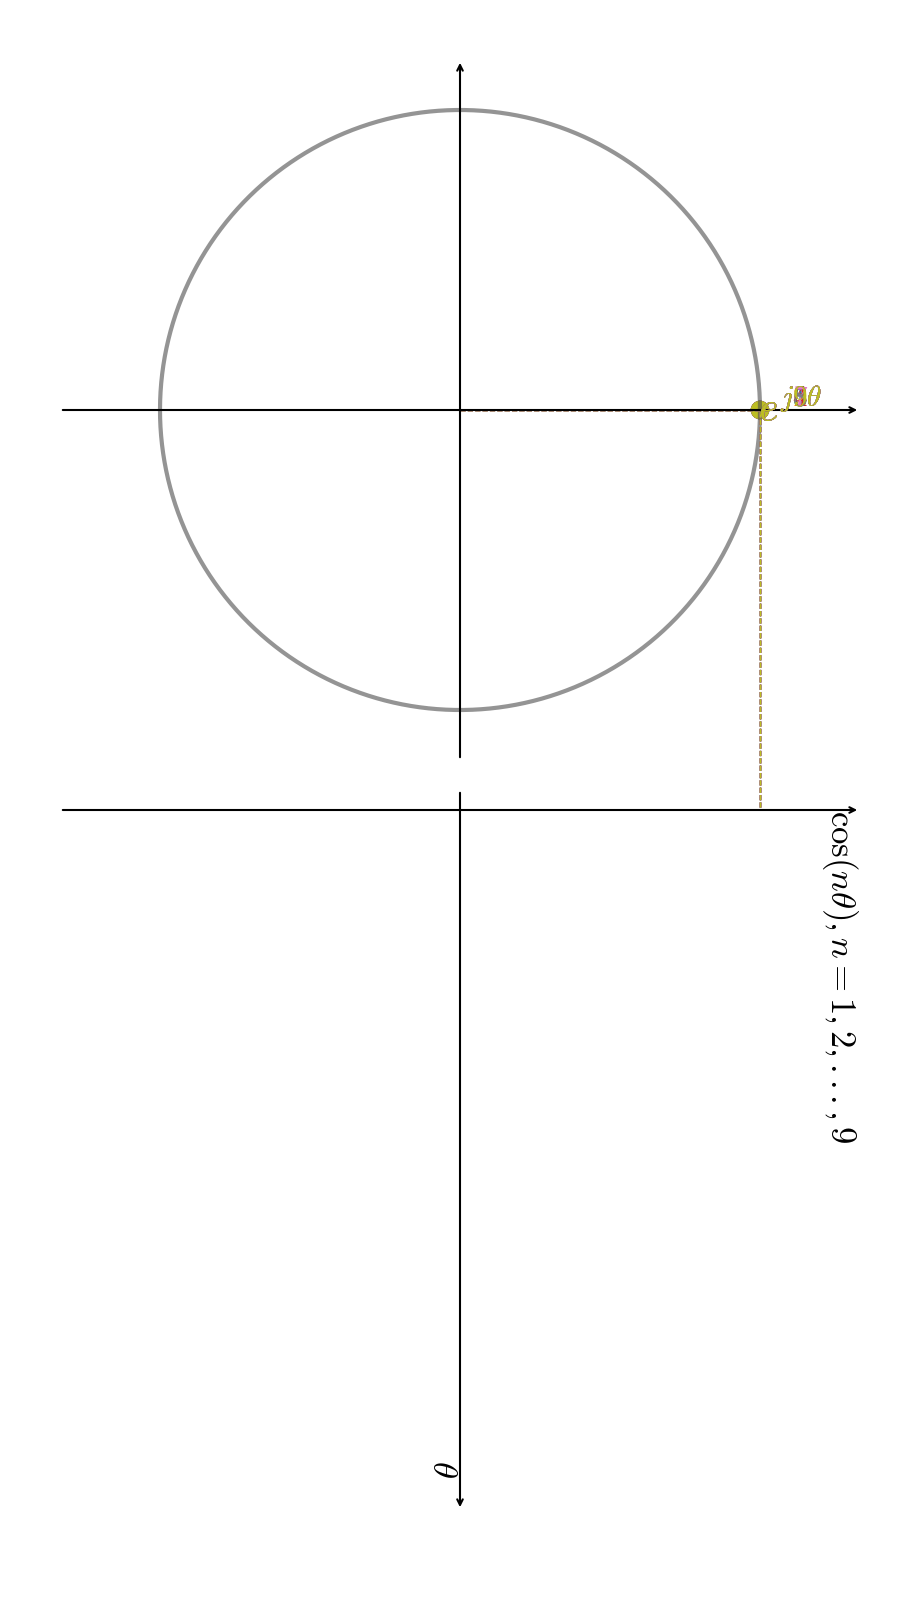

In [127]:
from matplotlib import pyplot,animation,cm
import numpy as np
pyplot.rcParams.update({"font.family":"sans-serif", "mathtext.fontset":"cm"})

Nl,Nf,r,x0,y0 = 9,1500,3,4.5,[12,8]
n = np.linspace(1,Nl,Nl)
theta=np.linspace(0,np.pi*2,Nf)
cr = r*np.exp(1j*theta)+x0+1j*y0[0]
clst = list(cm.tab10.colors) #colors of lines
fig = pyplot.figure(figsize=([9,16]))
ax = fig.add_axes([0,0,1,1],xlim=[0,9],ylim=[0,16],)
ax.axis('off')
ax.plot(cr.real,cr.imag,lw=3,c='0.3',alpha=.6)
for i in range(2):
  ax.annotate('',(x0+4,y0[i]),(x0-4,y0[i]),arrowprops={'arrowstyle':'->','lw':1.5})
  ax.annotate('',(x0,y0[i]+[3.5,-7][i]),(x0,y0[i]-[3.5,-.2][i]),arrowprops={'arrowstyle':'->','lw':1.5})
  ax.text([x0+4,x0][i],[y0[1],y0[1]-6.5][i],[rf'$\cos(n\theta),n=1,2,...,{Nl}$',r'$\theta$'][i],
          size=25,rotation=-90,va='top',ha='right')
sc=ax.scatter(n*0+x0,n*0+y0[0],marker='o',c=clst[:len(n)],s=150)
lines=[[ax.plot([],[],ls=['--','-'][k],lw=[1,1.5][k],c=clst[i])[0] for i in range(Nl)] for k in range(2)]
txt = [ax.text(0,0,'',c=clst[i],size=30,ha='center',va='center') for i in range(Nl)]
def animate(k):
  ejnt = r*np.exp(1j*theta[k]*n)
  cosnt = [x0+r*np.cos(n[i]*theta[:k+1]) for i in range(Nl)]
  sc.set_offsets(np.c_[ejnt.real+x0,ejnt.imag+y0[0]])
  [lines[0][i].set_data([x0,ejnt[i].real+x0,ejnt[i].real+x0],
   [y0[0],ejnt[i].imag+y0[0],y0[1]-theta[k]]) for i in range(Nl)]
  [lines[1][i].set_data(cosnt[i],y0[1]-theta[:k+1]) for i in range(Nl)]
  [txt[i].set_text(fr'$e^{{j{n[i]:.0f}\theta}}$') for i in range(Nl)]
  [txt[i].set_position((x0+1.1*ejnt[i].real,y0[0]+1.1*ejnt[i].imag)) for i in range(Nl)]
  return
anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=50)
anim.save("Euler_cos_ntheta.mp4",writer=animation.FFMpegWriter(fps=50),dpi=200)